# MELI Data Challenge 2021

In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="darkgrid",rc={'figure.figsize':(15,8)})

In [2]:
data = pd.read_parquet('data/train_data.parquet').astype({'date':'datetime64','currency':'category', \
        'listing_type':'category', 'shipping_payment': 'category','shipping_logistic_type': 'category'  })

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37660279 entries, 0 to 37660278
Data columns (total 9 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   sku                     int64         
 1   date                    datetime64[ns]
 2   sold_quantity           int64         
 3   current_price           float64       
 4   currency                category      
 5   listing_type            category      
 6   shipping_logistic_type  category      
 7   shipping_payment        category      
 8   minutes_active          float64       
dtypes: category(4), datetime64[ns](1), float64(2), int64(2)
memory usage: 1.5 GB


In [4]:
data

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active
0,464801,2021-02-01,0,156.78,REA,classic,fulfillment,free_shipping,1440.000000
1,464801,2021-02-02,0,156.78,REA,classic,fulfillment,free_shipping,1440.000000
2,464801,2021-02-03,0,156.78,REA,classic,fulfillment,free_shipping,1440.000000
3,464801,2021-02-04,0,156.78,REA,classic,fulfillment,free_shipping,1440.000000
4,464801,2021-02-05,1,156.78,REA,classic,fulfillment,free_shipping,1440.000000
...,...,...,...,...,...,...,...,...,...
37660274,129187,2021-03-31,0,22057.00,ARG,classic,drop_off,free_shipping,267.710767
37660275,6707,2021-03-31,0,26999.00,ARG,classic,cross_docking,free_shipping,266.083333
37660276,170355,2021-03-31,0,3400.00,ARG,classic,drop_off,paid_shipping,0.252633
37660277,246568,2021-03-31,0,6289.00,ARG,classic,fulfillment,free_shipping,135.416667


In [5]:
data['currency'].value_counts()

REA    19229164
MEX    15157756
ARG     3273179
DOL         180
Name: currency, dtype: int64

<AxesSubplot:title={'center':'Ventas según tipo de publicación'}, xlabel='Tipo de publicación', ylabel='Promedio de ventas por dia'>

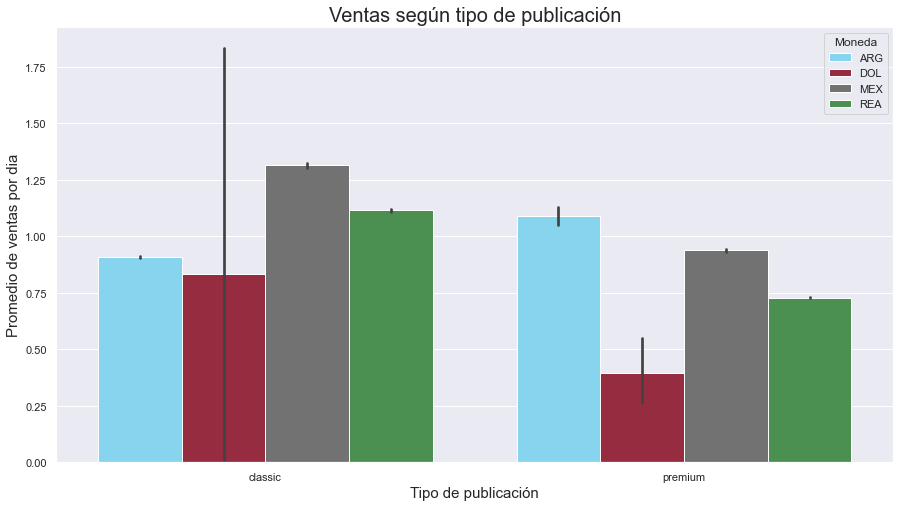

In [11]:
# BAR PLOT (El error en classic DOL es muy grande y no serviria para un analisis real)
ventas_publicacion = sns.barplot(x='listing_type', y = 'sold_quantity', hue = 'currency', data = data, palette=['#75DDFF', '#A61B34', '#737272', '#3F9C46'])

ventas_publicacion.set_title('Ventas según tipo de publicación', size=20)
ventas_publicacion.set_ylabel('Promedio de ventas por dia', size=15)
ventas_publicacion.set_xlabel('Tipo de publicación', size=15)
ventas_publicacion.legend(title='Moneda', loc='upper right' )

ventas_publicacion

In [12]:
data.groupby(by='currency').sum()

,sku,sold_quantity,current_price,minutes_active
currency,,,,
ARG,1081578955373,3017665,1.395095e+10,3.559589e+09
DOL,51344007,74,3.146190e+03,1.578253e+05
MEX,5009632622048,16961450,6.873250e+10,1.522596e+10
REA,6350708854614,17308003,6.111220e+09,2.050959e+10


In [13]:
# borro el dataset que cargué antes y levanto este porque sino no me entra en memoria
data_reducido = pd.read_parquet('data/train_data.parquet', columns=['sold_quantity', 'date', 'currency']).astype({'date':'datetime64','currency':'category' })
data_reducido

,sold_quantity,date,currency
0,0,2021-02-01,REA
1,0,2021-02-02,REA
2,0,2021-02-03,REA
3,0,2021-02-04,REA
4,1,2021-02-05,REA
...,...,...,...
37660274,0,2021-03-31,ARG
37660275,0,2021-03-31,ARG
37660276,0,2021-03-31,ARG
37660277,0,2021-03-31,ARG


In [14]:
ventas_fecha = data_reducido.groupby(by=['date', 'currency']).mean().unstack()
ventas_fecha

sold_quantity                              
currency             ARG       DOL       MEX       REA
date                                                  
2021-02-01      1.155025  0.000000  1.275193  0.842690
2021-02-02      1.148868  0.000000  1.325208  0.928913
2021-02-03      1.632962  0.333333  1.388879  0.939851
2021-02-04      0.923693  0.666667  1.391438  0.877186
2021-02-05      0.731554  0.666667  1.288260  0.782728
2021-02-06      0.640219  1.333333  1.132760  0.668769
2021-02-07      0.703288  0.333333  1.011122  0.645954
2021-02-08      1.079644  2.000000  1.394393  0.858013
2021-02-09      1.065496  0.666667  1.404732  0.959534
2021-02-10      1.202113  0.333333  1.410533  0.999169
2021-02-11      1.009803  1.666667  1.327637  0.942354
2021-02-12      0.672661  1.000000  1.240762  0.844541
2021-02-13      0.566384  0.333333  1.057386  0.706132
2021-02-14      0.496254  2.000000  0.864219  0.658742
2021-02-15      0.654151  0.000000  1.260052  0.844542
2021-02-16      0.843134  1.000000  1.281473  0.848558
2021-02-17      1.010684  0.000000  1.305778  0.955024
2021-02-18      1.073122  1.000000  1.241245  1.003114
2021-02-19      0.728976  0.666667  1.076975  0.792505
2021-02-20      0.563100  1.000000  0.965363  0.634107
2021-02-21      0.630539  0.000000  0.899940  0.631722
2021-02-22      0.963755  0.000000  1.221666  0.850930
2021-02-23      0.946118  0.000000  1.239013  0.961469
2021-02-24      1.186323  0.333333  1.212610  0.963195
2021-02-25      0.984066  1.000000  1.145153  0.893478
2021-02-26      0.811532  0.333333  1.125044  0.794737
2021-02-27      0.711922  0.333333  1.037326  0.713611
2021-02-28      0.788966  0.333333  0.966542  0.718213
2021-03-01      1.122139  0.333333  1.353918  0.887742
2021-03-02      1.088353  0.666667  1.268551  0.962697
2021-03-03      1.550683  0.333333  1.256824  0.977749
2021-03-04      0.994077  2.333333  1.192027  0.926536
2021-03-05      0.798603  0.000000  1.061269  0.923729
2021-03-06      0.696102  0.333333  0.918193  0.964534
2021-03-07      0.797149  0.000000  0.857678  0.862345
2021-03-08      1.125338  0.000000  1.128719  0.937624
2021-03-09      1.124466  1.000000  1.115030  1.145637
2021-03-10      1.285547  0.000000  1.146560  1.158740
2021-03-11      1.032222  0.666667  1.114852  1.074700
2021-03-12      0.768559  0.000000  1.046127  0.964799
2021-03-13      0.667947  0.000000  0.921315  0.830110
2021-03-14      0.744080  0.000000  0.839317  0.831753
2021-03-15      1.216314  0.000000  1.076358  1.073558
2021-03-16      1.132547  0.000000  1.162495  1.128712
2021-03-17      1.359621  0.666667  1.113478  1.055604
2021-03-18      1.058192  1.000000  1.107495  1.020070
2021-03-19      0.798208  0.000000  0.984785  0.893676
2021-03-20      0.707241  0.000000  0.822748  0.786184
2021-03-21      0.759157  0.000000  0.799043  0.802235
2021-03-22      1.069091  0.000000  1.140042  0.947079
2021-03-23      0.817553  0.000000  1.151354  1.045130
2021-03-24      0.852791  0.000000  1.137464  1.063960
2021-03-25      0.940297  0.000000  1.076915  0.994508
2021-03-26      0.820928  0.000000  0.996041  0.911528
2021-03-27      0.726197  0.000000  0.854036  0.767663
2021-03-28      0.757602  0.000000  0.789531  0.776218
2021-03-29      1.166167  0.000000  1.103970  0.995088
2021-03-30      0.892108  0.000000  1.076279  1.075889
2021-03-31      0.622601  0.000000  1.066402  0.988027

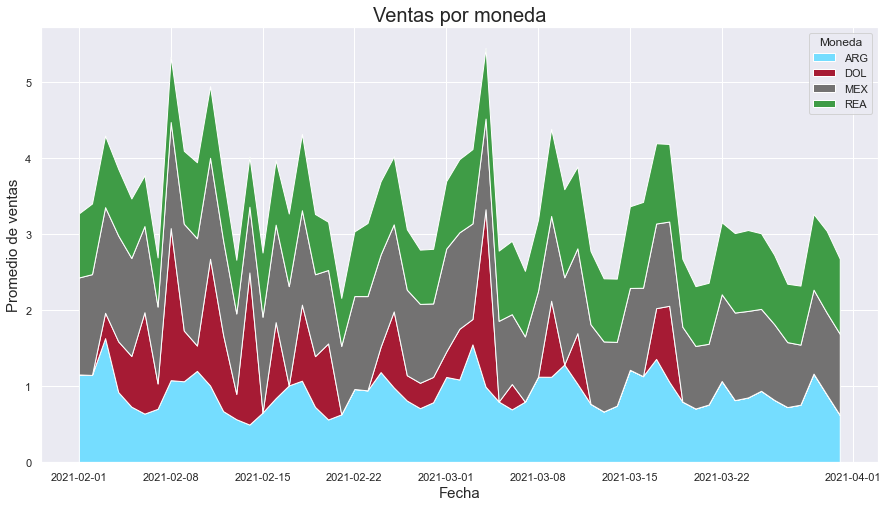

In [15]:
# STACKED AREA PLOT
sns.set_theme()
color_map = ['#75DDFF', '#A61B34', '#737272', '#3F9C46']
    
plot_ventas_fecha = plt.stackplot(ventas_fecha.index, ventas_fecha[('sold_quantity', 'ARG')], ventas_fecha[('sold_quantity', 'DOL')], ventas_fecha[('sold_quantity', 'MEX')], ventas_fecha[('sold_quantity', 'REA')],
              labels=['ARG', 'DOL', 'MEX', 'REA'],
              colors=color_map)

plt.ylabel('Promedio de ventas', size=15)
plt.xlabel('Fecha', size=15)
plt.legend(title='Moneda', loc='upper right' , labels=['ARG', 'DOL', 'MEX', 'REA'])
plt.title('Ventas por moneda', size=20)

plt.show()

# DengAI: Predicting Disease Spread

In [2]:
labels = pd.read_csv('data/dengue/dengue_labels_train.csv')
labels

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [3]:
features = pd.read_csv('data/dengue/dengue_features_train.csv').join(labels['total_cases'])
features

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


<AxesSubplot:title={'center':'Casos semanales de Dengue por temperatura'}, xlabel='Temperatura promedio semanal', ylabel='Casos semanales totales de Dengue'>

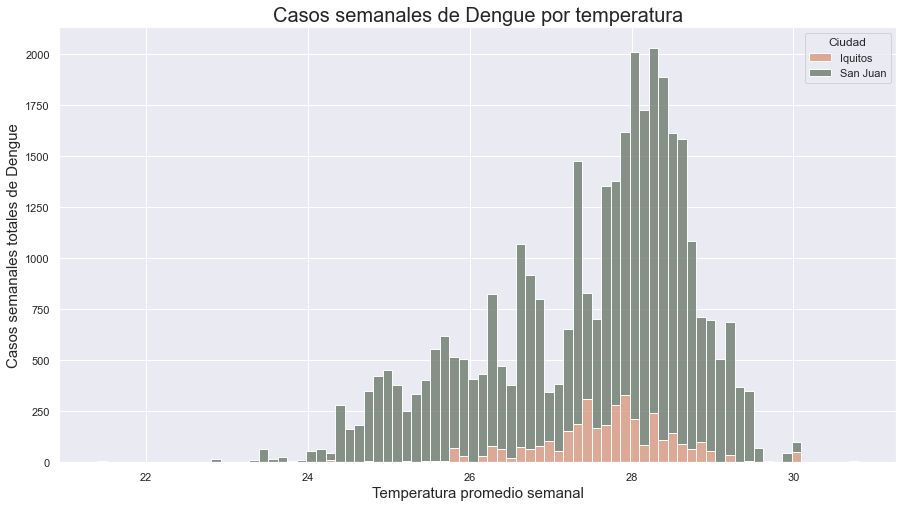

In [4]:
# STACKED HISTOGRAM PLOT
sns.set(style="darkgrid",rc={'figure.figsize':(15,8)})
plot_cantCasos_temp = sns.histplot(data=features,x='station_avg_temp_c',hue="city", multiple="stack" , weights='total_cases', bins= 80 ,palette=['#647362', '#D99379'])
plot_cantCasos_temp.set_title('Casos semanales de Dengue por temperatura',size=20)
plot_cantCasos_temp.set_ylabel('Casos semanales totales de Dengue',size=15)
plot_cantCasos_temp.set_xlabel('Temperatura promedio semanal',size=15)
plot_cantCasos_temp.legend(title='Ciudad', loc='upper right', labels=['Iquitos','San Juan'])
plot_cantCasos_temp

In [5]:
# hago esto para poder graficar la distribucion de los casos respecto de la humedad
humedades = []
for linea in features.groupby(by= 'reanalysis_relative_humidity_percent')['total_cases'].mean().reset_index().itertuples():
    for i in range(int(linea.total_cases)):
        humedades.append(linea.reanalysis_relative_humidity_percent)

<AxesSubplot:title={'center':'Casos semanales de Dengue por humedad en el ambiente'}, ylabel='Porcentaje de humedad'>

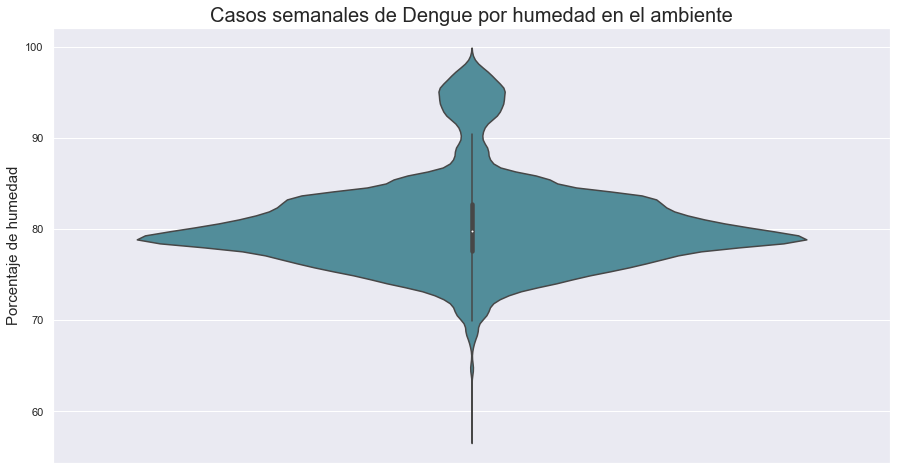

In [6]:
# VIOLIN PLOT
plot_violin = sns.violinplot( y=humedades,color='#4694A6')
plot_violin.set_title('Casos semanales de Dengue por humedad en el ambiente',size=20)
plot_violin.set_ylabel('Porcentaje de humedad',size=15)
plot_violin

# Flu Shot Learning

In [7]:
labelsFlu = pd.read_csv('data/gripe/training_set_labels.csv')
labelsFlu

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [8]:
featuresFlu = pd.read_csv('data/gripe/training_set_features.csv').astype({'age_group': 'category'}).join(labelsFlu.loc[:, ['h1n1_vaccine','seasonal_vaccine'] ])
featuresFlu

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [9]:
featuresFlu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   respondent_id                26707 non-null  int64   
 1   h1n1_concern                 26615 non-null  float64 
 2   h1n1_knowledge               26591 non-null  float64 
 3   behavioral_antiviral_meds    26636 non-null  float64 
 4   behavioral_avoidance         26499 non-null  float64 
 5   behavioral_face_mask         26688 non-null  float64 
 6   behavioral_wash_hands        26665 non-null  float64 
 7   behavioral_large_gatherings  26620 non-null  float64 
 8   behavioral_outside_home      26625 non-null  float64 
 9   behavioral_touch_face        26579 non-null  float64 
 10  doctor_recc_h1n1             24547 non-null  float64 
 11  doctor_recc_seasonal         24547 non-null  float64 
 12  chronic_med_condition        25736 non-null  float64 
 13  c

In [10]:
featuresFlu['health_insurance'] = featuresFlu['health_insurance'].replace({1:'Si', 0:'No'})

Text(0.5, 1.0, 'Encuesta sobre el riesgo de contraer gripe estacional por la vacuna')

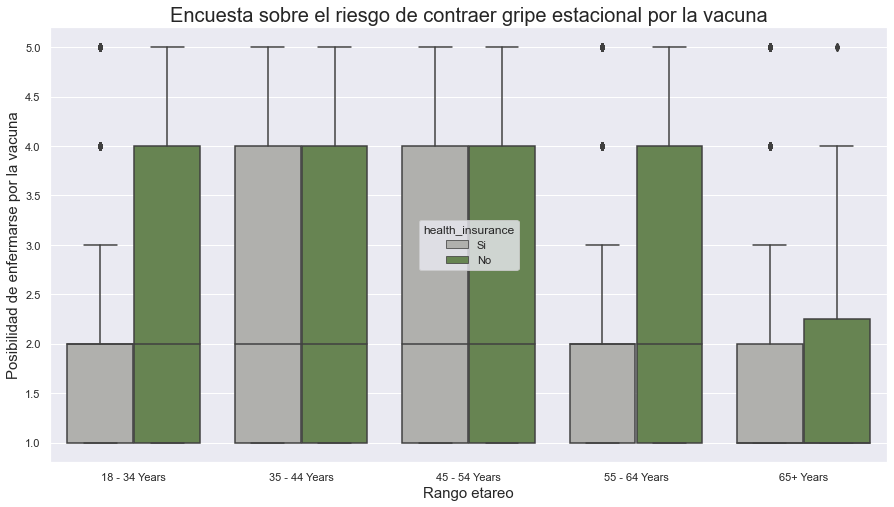

In [11]:
# BOX PLOT
plot_edades = sns.boxplot(data = featuresFlu, y='opinion_seas_sick_from_vacc', x='age_group', hue='health_insurance', palette=['#B1B1AC','#668C4A'])
plot_edades.set_ylabel('Posibilidad de enfermarse por la vacuna', size=15)
plot_edades.set_xlabel('Rango etareo', size=15)
plot_edades.set_title('Encuesta sobre el riesgo de contraer gripe estacional por la vacuna', size=20)

<AxesSubplot:title={'center':'Encuesta sobre el riesgo de contagiarse gripe estacional'}, xlabel='Medico recomendó aplicarse la vacuna', ylabel='Riesgo de contagiarse'>

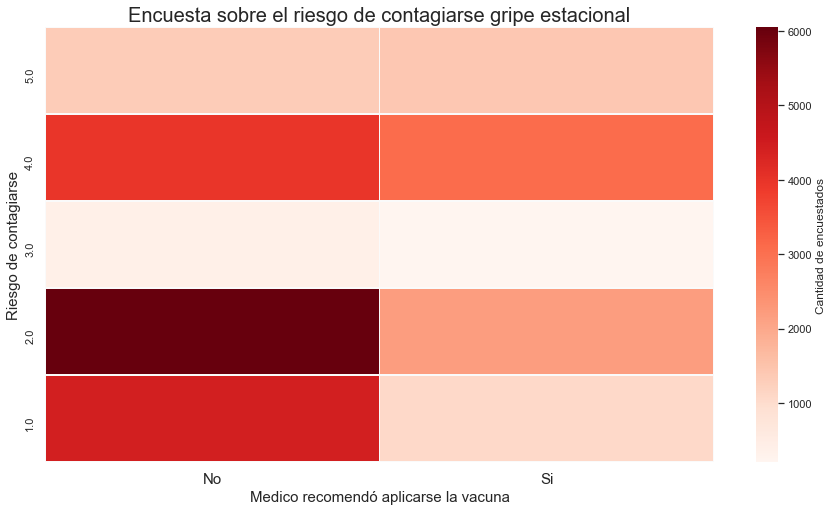

In [12]:
# HEAT MAP
plot_heat = sns.heatmap(featuresFlu.loc[:, ['doctor_recc_seasonal', 'opinion_seas_risk']].dropna(axis=0).value_counts().unstack().T.sort_index(ascending=False), cmap='Reds',linewidths=1, linecolor='#FAFAFA', cbar_kws={'label':'Cantidad de encuestados'})
plot_heat.set_ylabel('Riesgo de contagiarse', size=15)
plot_heat.set_xlabel('Medico recomendó aplicarse la vacuna', size=15)
plot_heat.set_title('Encuesta sobre el riesgo de contagiarse gripe estacional', size=20)
plot_heat.set_xticklabels(['No', 'Si'], size=15)

plot_heat